## PREDICTING WIND ENERGY PRODUCTION

The objetive of this project is to develop a machine learing model for estimating how much energy is going to be produced at the Sotavento experimental wind farm. To do it, we will use meteorological variables forecasted by ECMWF (http://www.ecmwf.int/) as input attributes. We have 22 variables, but, it is common practice to use the value of those variables, not just at the location of interest (Sotavento in this case), but at points in a grid around Sotavento. A 5x5 grid will be used in this case. Important to have in mind that the values at point 13 are the ones exactly Sotavento.Therefore, finally we have 550 variables (plus other 5 measuring energy, year, month, day and hour). The 22 variables are described as follows: 

- t2m: 2 metre temperature
- u10: 10 metre U wind component
- v10: 10 metre V wind component
- u100: 100 metre U wind component
- v100: 100 metre V wind component
- cape: Convective available potential energy
- flsr: Forecast logarithm of surface roughness for heat
- fsr: Forecast surface roughness
- iews: Instantaneous eastward turbulent surface stress
- inss: Instantaneous northward turbulent surface
- lai_hv: Leaf area index, high vegetation
- lai_lv: Leaf area index, low vegetation
- u10n: Neutral wind at 10 m u-component
- v10n: Neutral wind at 10 m v-component
- stl1: Soil temperature level 1
- stl2: Soil temperature level 2
- stl3: Soil temperature level 3
- stl4: Soil temperature level 4
- sp: Surface pressure
- p54.162: Vertical integral of temperature
- p59.162: Vertical integral of divergence of kinetic energy
- p55.162: Vertical integral of water vapour


First, we load the dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
wind_ava = pd.read_csv("C:\\Users\\victoria\\Escritorio\\MASTER\\Big Data Intelligence\\Assignment_1\\Big_Data_Intelligence\\wind_available.csv.gzip", compression="gzip")

In [5]:
#pongo aqui abajo mi path 
#wind_ava = pd.read_csv("/Users/pameladiaz/Documents/GitHub/Big_Data_Intelligence/wind_available.csv.gzip", compression="gzip")

## 1. Exploratory Data Analysis

It is important before starting any machine learning project to observe and understand the data we have. Therefore, during this section we will be exploring how many features and how many instances the dataset has, which variables are categorical / numerical, which features have missing values and how many, whether there are constant columns, some statistics, and whether it is a regression or classification problem. 

Finally, we will plot some of the variables in terms of the target for trying to find some relations.

### 1.1. Number of features

As previosly explained, the dataset contains 555 variables and 4747 instances.

In [6]:
pd.set_option('display.max_rows', 10)
wind_ava

,energy,year,month,day,hour,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,402.71,2005,1,2,18,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,...,-4.683596,NaN,-4.407196,NaN,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,696.80,2005,1,3,0,NaN,NaN,2.521184e+06,2.513088e+06,NaN,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,NaN
2,1591.15,2005,1,3,6,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,NaN,...,-1.454105,NaN,-1.138290,NaN,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,1338.62,2005,1,3,12,NaN,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,562.50,2005,1,3,18,2.529543e+06,NaN,2.513702e+06,2.505782e+06,2.497861e+06,...,1.939031,NaN,NaN,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,1280.13,2009,12,30,6,NaN,2.400131e+06,2.393033e+06,2.385939e+06,2.378841e+06,...,9.377886,9.271118,9.164849,9.058080,8.951312,9.402832,9.291075,NaN,9.068059,8.956800
4744,855.00,2009,12,30,12,2.407234e+06,2.400117e+06,2.393001e+06,2.385885e+06,2.378768e+06,...,7.345796,NaN,7.655624,NaN,7.964953,7.457055,7.604734,7.751915,7.899595,8.047274
4745,117.06,2009,12,30,18,2.401034e+06,2.393683e+06,2.386332e+06,2.378981e+06,2.371630e+06,...,3.485674,3.535566,3.585458,3.635349,3.685241,3.505132,3.552030,3.598429,3.645328,3.691727
4746,516.96,2009,12,31,12,2.393873e+06,2.386499e+06,2.379125e+06,2.371752e+06,2.364378e+06,...,1.988424,NaN,NaN,NaN,2.529749,1.960983,2.094194,2.226906,2.360117,2.492829


### 1.2. Variable type

All the variables we are dealing with are numerical, most of them continuous and only the ones specifiying the time when the measure was taken (year, month, day and hour) are of type integer. This leaves us with a regression problem, as the target variable 'energy' is a continuous numerical variable.

In [7]:
pd.set_option('display.max_rows', None)
wind_ava.dtypes

energy        float64
year            int64
month           int64
day             int64
hour            int64
p54.162.1     float64
p54.162.2     float64
p54.162.3     float64
p54.162.4     float64
p54.162.5     float64
p54.162.6     float64
p54.162.7     float64
p54.162.8     float64
p54.162.9     float64
p54.162.10    float64
p54.162.11    float64
p54.162.12    float64
p54.162.13    float64
p54.162.14    float64
p54.162.15    float64
p54.162.16    float64
p54.162.17    float64
p54.162.18    float64
p54.162.19    float64
p54.162.20    float64
p54.162.21    float64
p54.162.22    float64
p54.162.23    float64
p54.162.24    float64
p54.162.25    float64
p55.162.1     float64
p55.162.2     float64
p55.162.3     float64
p55.162.4     float64
p55.162.5     float64
p55.162.6     float64
p55.162.7     float64
p55.162.8     float64
p55.162.9     float64
p55.162.10    float64
p55.162.11    float64
p55.162.12    float64
p55.162.13    float64
p55.162.14    float64
p55.162.15    float64
p55.162.16

### 1.3. Missing values

If any of the variables has many missing values (more than 80%) we should remove it. After checking it, we are sure none of them  has more than 80% nulls, the maximum is 20.3 % for the variable lai_hv.13 (Leaf area index, high vegetation, section 13, Sotavento). It is difficult to determine the reason most of the variables has nulls, as we are not experts on the field. We will try to solve this later on the preprocessing with imputation methods.


In [8]:
null_percentage = wind_ava.isnull().sum()/ len(wind_ava) * 100
print(null_percentage[null_percentage > 80])
print(max(null_percentage))
null_percentage

Series([], dtype: float64)
20.30328559393429


energy         0.000000
year           0.000000
month          0.000000
day            0.000000
hour           0.000000
p54.162.1      7.834878
p54.162.2      9.709351
p54.162.3      5.539174
p54.162.4      6.613311
p54.162.5     10.299073
p54.162.6     17.796967
p54.162.7     18.239259
p54.162.8     11.962932
p54.162.9      9.519798
p54.162.10     5.728728
p54.162.11    17.144061
p54.162.12     9.077506
p54.162.13    18.302443
p54.162.14     5.560236
p54.162.15     8.066554
p54.162.16     4.949452
p54.162.17    18.281382
p54.162.18    16.364785
p54.162.19    18.639427
p54.162.20    10.046335
p54.162.21    17.965459
p54.162.22    16.596462
p54.162.23    11.604886
p54.162.24    14.679865
p54.162.25    12.594777
p55.162.1      6.781803
p55.162.2      6.634372
p55.162.3     15.522325
p55.162.4      7.392586
p55.162.5      9.898905
p55.162.6      6.276327
p55.162.7      9.814659
p55.162.8     10.299073
p55.162.9     17.122999
p55.162.10    10.741365
p55.162.11     5.918281
p55.162.12    10

### 1.4. Statistics

As all of our variables are numeric, we can perform a statistical analysis by giving some information about the mean, standard deviation, quantiles etc.

In [9]:
wind_ava.describe().T


,count,mean,std,min,25%,50%,75%,max
energy,4748.0,6.931262e+02,6.655316e+02,1.000000e-02,1.441700e+02,4.653050e+02,1.089375e+03,2.792550e+03
year,4748.0,2.006628e+03,1.414856e+00,2.005000e+03,2.005000e+03,2.006000e+03,2.007000e+03,2.009000e+03
month,4748.0,6.628054e+00,3.475914e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
day,4748.0,1.565249e+01,8.844734e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
hour,4748.0,9.123842e+00,6.755085e+00,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,1.800000e+01
p54.162.1,4376.0,2.512664e+06,4.498680e+04,2.380562e+06,2.481905e+06,2.513508e+06,2.548502e+06,2.604194e+06
p54.162.2,4287.0,2.504671e+06,4.519397e+04,2.373125e+06,2.473722e+06,2.505370e+06,2.540545e+06,2.596310e+06
p54.162.3,4485.0,2.497395e+06,4.504295e+04,2.365683e+06,2.466373e+06,2.498471e+06,2.533515e+06,2.588421e+06
p54.162.4,4434.0,2.489648e+06,4.483586e+04,2.358246e+06,2.458621e+06,2.490711e+06,2.525281e+06,2.580532e+06
p54.162.5,4259.0,2.481708e+06,4.460474e+04,2.350809e+06,2.451135e+06,2.482535e+06,2.517041e+06,2.572648e+06


### 1.5. Constant columns

Similarly with the null values, if any column has constant values, this gives no information to the final model, so it should be removed. Taking into account that some variables have null values, we should look if the number of unique values is less or equal to 2 (the constant value and Nan). As is not the case, we don't have any column with constant values.

In [10]:
print(wind_ava.nunique() <= 2)
#wind_ava.nunique()

energy        False
year          False
month         False
day           False
hour          False
p54.162.1     False
p54.162.2     False
p54.162.3     False
p54.162.4     False
p54.162.5     False
p54.162.6     False
p54.162.7     False
p54.162.8     False
p54.162.9     False
p54.162.10    False
p54.162.11    False
p54.162.12    False
p54.162.13    False
p54.162.14    False
p54.162.15    False
p54.162.16    False
p54.162.17    False
p54.162.18    False
p54.162.19    False
p54.162.20    False
p54.162.21    False
p54.162.22    False
p54.162.23    False
p54.162.24    False
p54.162.25    False
p55.162.1     False
p55.162.2     False
p55.162.3     False
p55.162.4     False
p55.162.5     False
p55.162.6     False
p55.162.7     False
p55.162.8     False
p55.162.9     False
p55.162.10    False
p55.162.11    False
p55.162.12    False
p55.162.13    False
p55.162.14    False
p55.162.15    False
p55.162.16    False
p55.162.17    False
p55.162.18    False
p55.162.19    False
p55.162.20    False


### 1.6. Visualization

Let's observe first how the objective variable looks. It follows an exponential distribution, as most of the values are around the highest energy production.

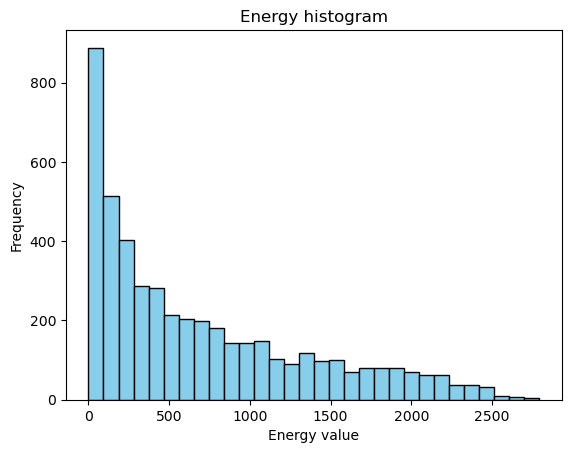

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 10)

plt.hist(wind_ava['energy'],  bins=30, color='skyblue', edgecolor='black')
plt.title(f'Energy histogram')
plt.xlabel('Energy value')
plt.ylabel('Frequency')

# Muestra el histograma
plt.show()

We could also observe the mean enery production per year. As observed,  most of the years have similar energy production.

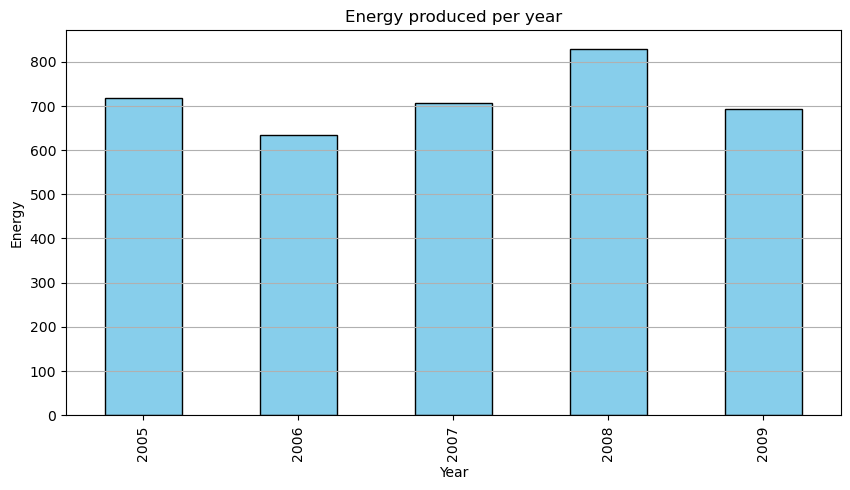

In [12]:
# Calcular el promedio de energía por año
mean_energy = wind_ava.groupby('year')['energy'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico según tus preferencias
mean_energy.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar el gráfico (opcional)
plt.title('Energy produced per year')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.grid(axis='y')

# Mostrar el gráfico de barras
plt.show()

Similarly, we could observe the mean energy production per month. This plot give us more valuable information, becuase, as it could be expected, on the months of worst weather and more wind, the energy production is highly increased.

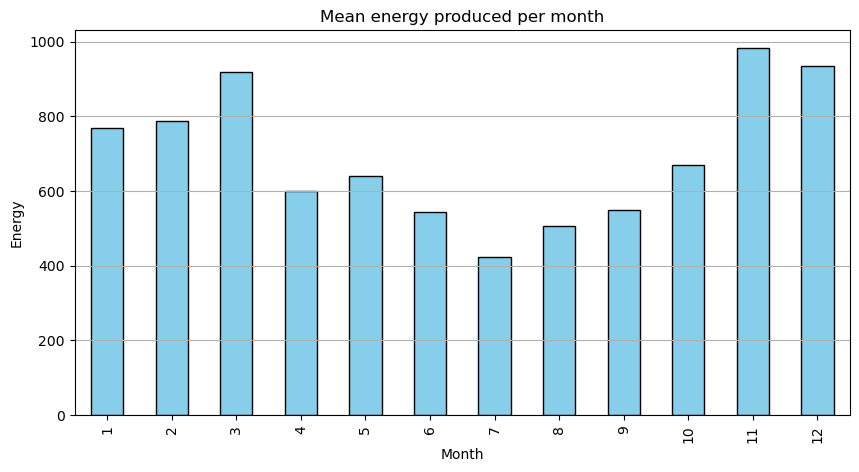

In [13]:
# Calcular el promedio de energía por año
mean_energy = wind_ava.groupby('month')['energy'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico según tus preferencias
mean_energy.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar el gráfico (opcional)
plt.title('Mean energy produced per month')
plt.xlabel('Month')
plt.ylabel('Energy')
plt.grid(axis='y')

# Mostrar el gráfico de barras
plt.show()

### 1.7. Feature transformation

Althought we have many variables, it is understandable that the variables u100 (100 metre U wind component) and v100 (100 metre V wind component) give us the most valuable information. However, the modullus is more valuable, as measures the wind speed at 100 meters high. Therefore, we would add this as a new variable to our data. 

In [14]:
## CHAT GPT
# Assuming wind_ava is your DataFrame
v_wind_columns = wind_ava.columns[wind_ava.columns.str.startswith('v100.')]
u_wind_columns = wind_ava.columns[wind_ava.columns.str.startswith('u100.')]

# Iterate through pairs of u and v columns
for u_col, v_col in zip(u_wind_columns, v_wind_columns):
    # Extract u and v components
    u_component = wind_ava[u_col]
    v_component = wind_ava[v_col]

    # Calculate wind speed
    wind_speed_col = f"wind_speed{u_col.split('.')[1]}"
    wind_ava[wind_speed_col] = np.sqrt(u_component**2 + v_component**2)

# Display the modified DataFrame with new wind speed columns
wind_ava.head()

,energy,year,month,day,hour,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,...,wind_speed16,wind_speed17,wind_speed18,wind_speed19,wind_speed20,wind_speed21,wind_speed22,wind_speed23,wind_speed24,wind_speed25
0,402.71,2005,1,2,18,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,...,5.134636,NaN,NaN,NaN,4.393808,5.137268,4.948249,4.760744,4.574870,4.389944
1,696.80,2005,1,3,0,NaN,NaN,2.521184e+06,2.513088e+06,NaN,...,5.298553,NaN,4.869726,4.655077,4.440835,5.300003,5.085998,4.872320,4.658335,NaN
2,1591.15,2005,1,3,6,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,NaN,...,5.587899,NaN,NaN,NaN,NaN,5.529130,5.324473,5.122190,4.922326,NaN
3,1338.62,2005,1,3,12,NaN,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,...,4.779456,4.715311,4.655777,4.600019,4.549180,4.698198,4.634036,4.573135,4.516475,4.463542
4,562.50,2005,1,3,18,2.529543e+06,NaN,2.513702e+06,2.505782e+06,2.497861e+06,...,3.941046,NaN,NaN,3.917355,NaN,NaN,3.851946,3.843097,3.836565,3.832704


As can be observed, this new variable againts the response variable follows a linear relation, so it will give us valuable information when modelling the predictor.

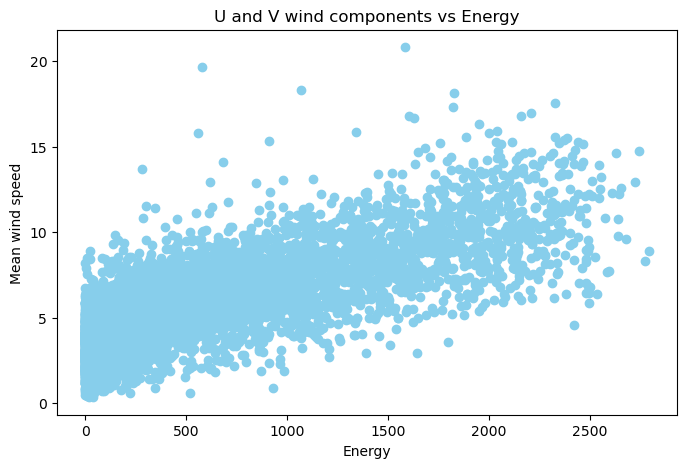

In [15]:
plt.figure(figsize=(8, 5))

# Obtain the columns defining the u and v components of the wind 
wind_speed_columns = wind_ava.columns[wind_ava.columns.str.startswith('wind_speed')]

 
plt.scatter(wind_ava['energy'], wind_ava[wind_speed_columns].mean(axis=1), c='skyblue')
plt.xlabel('Energy')
plt.ylabel('Mean wind speed')
plt.title('U and V wind components vs Energy')
plt.show()

## 2. Inner, outer evaluation and metric

### 2.1. Holdout split

After a exploration of our dataset, the next crucial step was to select the evaluation strategy.Given the considerable volume of data at our disposal, we decided to perform a holdout strategy for both inner and outer evaluations.Cross-validation was not used because it is more computationally intensive and time-consuming, particularly in the context of our substantial dataset. 

Moreover, a key factor influencing our choice is the intrinsic nature of our data—a time series with dependencies that render it non-independent and non-identically distributed (non-i.i.d.). Consequently, we have employed a partitioning strategy based on complete years. This approach ensures that each partition is not only representative of the problem at hand but also respects the temporal dependencies inherent in the data.

Visualizing the dataset through plots further informed our decision-making. Notably, for the year 2008, data is available only for January and February, whereas in 2009, we have a dataset spanning from March to December. To ensure a representative evaluation, we opted to combine the data from these two years, designating them as the test partition. The remaining years were used for training.

Later on, within our training data, we took another step and split it into two parts: train-validation and train-train. We used the data from 2007 for train-validation, while 2005 and 2006 became the training set.

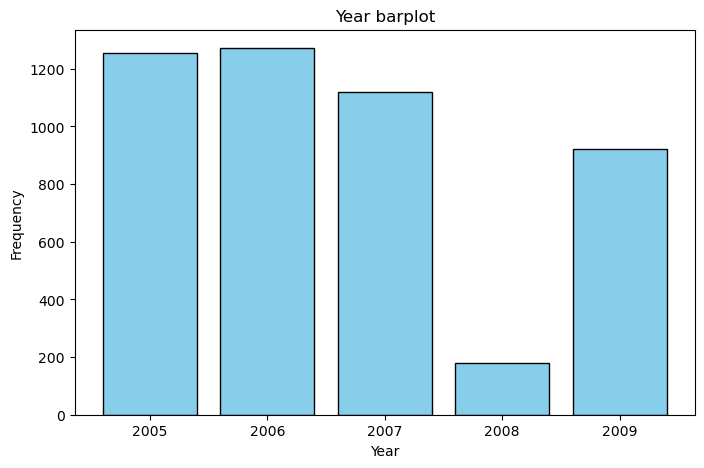

In [16]:
plt.figure(figsize=(8, 5))

plt.bar(wind_ava['year'].value_counts().index, wind_ava['year'].value_counts().values, color='skyblue', edgecolor='black')
plt.title(f'Year barplot')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Muestra el histograma
plt.show()

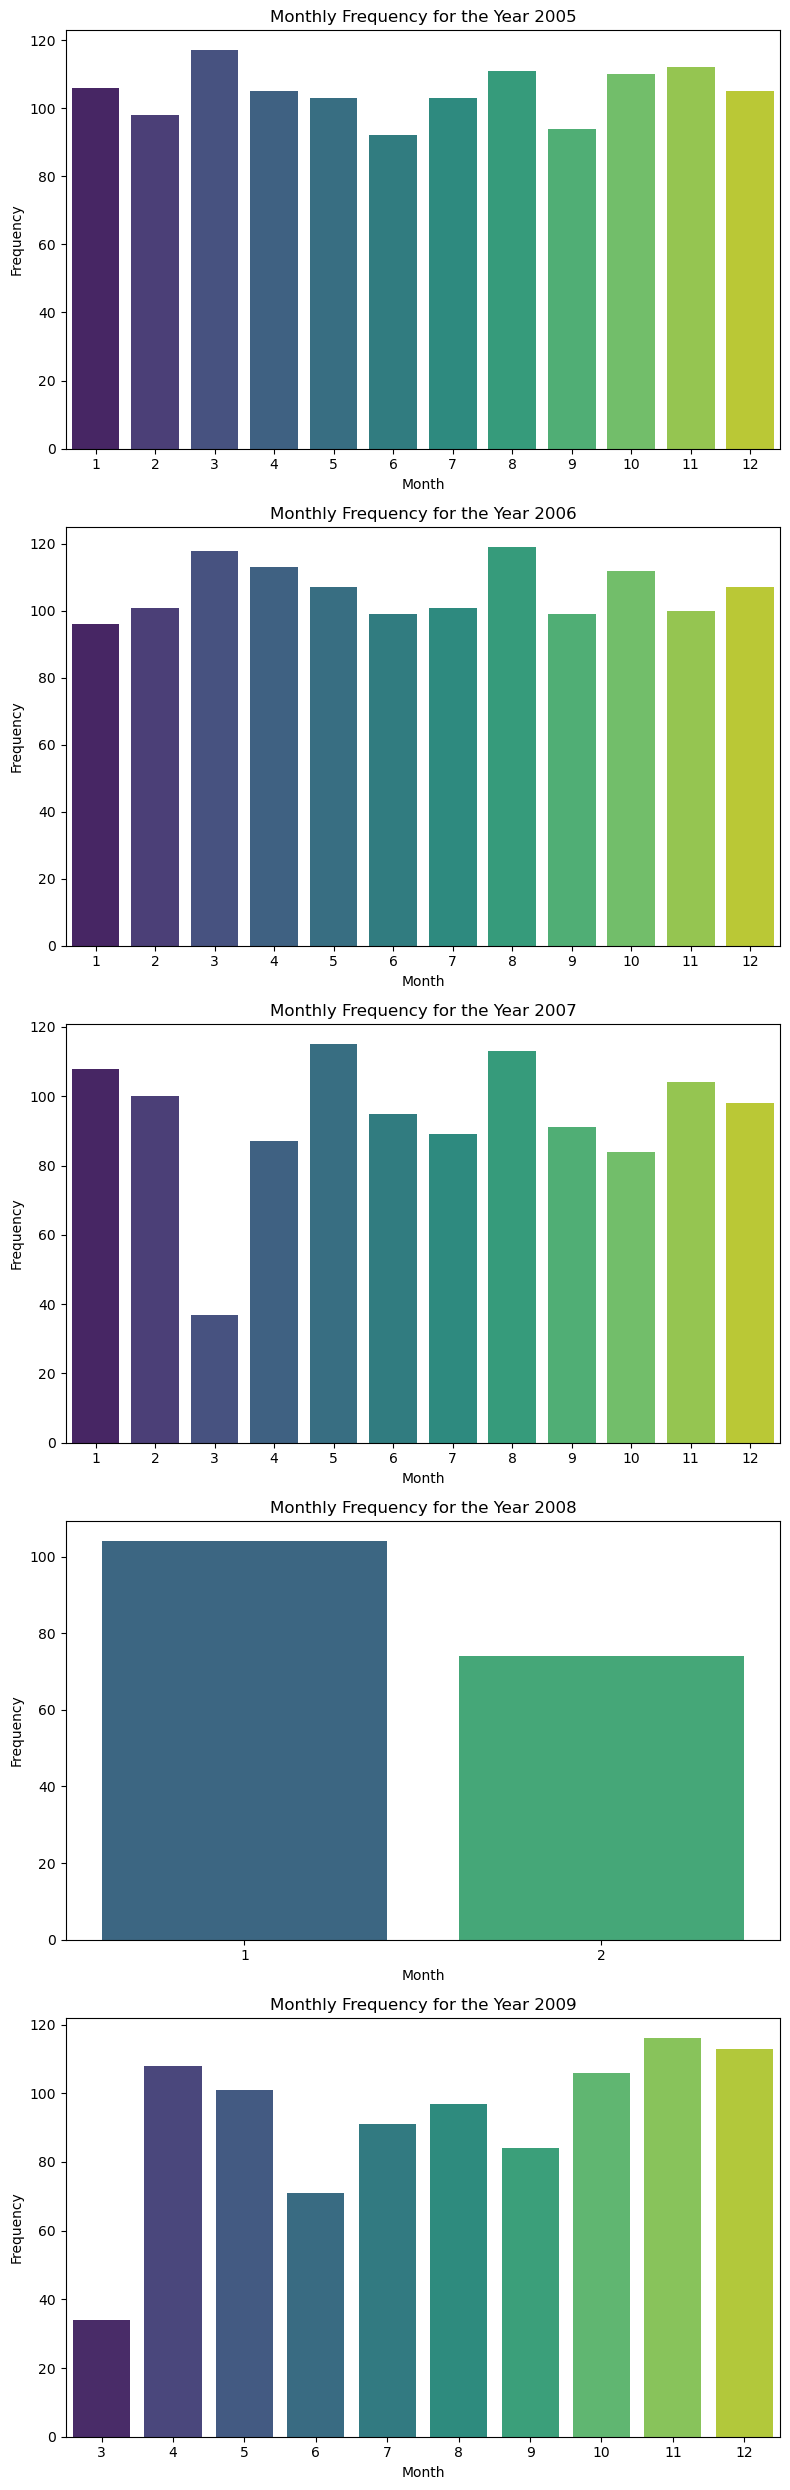

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, but can enhance the appearance of the plot

# Assuming 'wind_ava' is your DataFrame with 'year' and 'month' columns

# Get unique years in the DataFrame
unique_years = wind_ava['year'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(8, 5 * len(unique_years)))

# Loop through each year and create a bar plot for the frequency of each month
for i, year in enumerate(unique_years):
    ax = axes[i]
    
    # Filter data for the current year
    data_year = wind_ava[wind_ava['year'] == year]
    
    # Create a count plot for the 'month' column
    sns.countplot(x='month', data=data_year, ax=ax, palette='viridis')
    
    # Customize the plot
    ax.set_title(f'Monthly Frequency for the Year {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [18]:
##chat gpt
# Splitting the data into training and test sets
train_data = wind_ava[wind_ava['year'].isin([2005, 2006, 2007])]
test_data = wind_ava[wind_ava['year'].isin([2008, 2009])]

# Further split the training set into train-train and train-validation
train_train_data = train_data[train_data['year'].isin([2005, 2006])]
train_validation_data = train_data[train_data['year'] == 2007]


# Features and target for training set
X_train_train = train_train_data.drop('energy', axis=1)
#y_train_train = train_train_data['energy']

X_train = train_data.drop('energy', axis=1)
y_train = train_data['energy']


# Features and target for validation set
X_train_validation = train_validation_data.drop('energy', axis=1)
#y_train_validation = train_validation_data['energy']

# Features and target for test set
X_test = test_data.drop('energy', axis=1)
y_test = test_data['energy']


In [19]:
X_train_train

,year,month,day,hour,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,...,wind_speed16,wind_speed17,wind_speed18,wind_speed19,wind_speed20,wind_speed21,wind_speed22,wind_speed23,wind_speed24,wind_speed25
0,2005,1,2,18,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,...,5.134636,NaN,NaN,NaN,4.393808,5.137268,4.948249,4.760744,4.574870,4.389944
1,2005,1,3,0,NaN,NaN,2.521184e+06,2.513088e+06,NaN,2.533465e+06,...,5.298553,NaN,4.869726,4.655077,4.440835,5.300003,5.085998,4.872320,4.658335,NaN
2,2005,1,3,6,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,NaN,2.529801e+06,...,5.587899,NaN,NaN,NaN,NaN,5.529130,5.324473,5.122190,4.922326,NaN
3,2005,1,3,12,NaN,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,...,4.779456,4.715311,4.655777,4.600019,4.549180,4.698198,4.634036,4.573135,4.516475,4.463542
4,2005,1,3,18,2.529543e+06,NaN,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,...,3.941046,NaN,NaN,3.917355,NaN,NaN,3.851946,3.843097,3.836565,3.832704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2006,12,30,18,2.531658e+06,2.523999e+06,2.516341e+06,2.508682e+06,2.501024e+06,2.528088e+06,...,NaN,7.081786,NaN,6.827535,6.705611,7.088197,6.958864,NaN,6.709210,6.589214
2524,2006,12,31,0,2.539163e+06,2.531518e+06,2.523873e+06,2.516232e+06,NaN,NaN,...,6.645929,6.514249,NaN,6.254974,6.128445,NaN,NaN,6.337834,6.205970,6.076298
2525,2006,12,31,6,NaN,2.531319e+06,2.523746e+06,2.516169e+06,2.508592e+06,NaN,...,NaN,9.983364,NaN,9.302453,8.962472,10.101748,9.762793,9.423936,9.085858,NaN
2526,2006,12,31,12,2.542813e+06,2.535223e+06,2.527636e+06,NaN,NaN,2.539280e+06,...,NaN,NaN,NaN,10.308970,9.983251,11.019013,10.692057,10.365836,NaN,NaN


In [20]:
#y_train_train

### 2.2. Metric

CHAT GPT:
The choice of which metric to use for evaluating a regression model depends on the specific characteristics of the problem and our goals. As a summary of the benefits and drawbacks of the most commonly used regression metrics:

- Mean Squared Error (MSE) or Root Mean Squared Error (RMSE): These are often preferred when large errors should be penalized more heavily, and the distribution of errors is approximately normal. However, if your data contains outliers, MSE and RMSE can be significantly affected.

- Mean Absolute Error (MAE): These are more robust to outliers. If your dataset has a skewed distribution or contains outliers, MAE might be more appropriate.

Therefore, we will evaluate the outliers of our objetive variable to understand which metric is better on this problem. As observed, the data is rigth skewed, with many outliers on the rigth section, therefore, a MAE metric would affect less to these errors when predicting outliers.

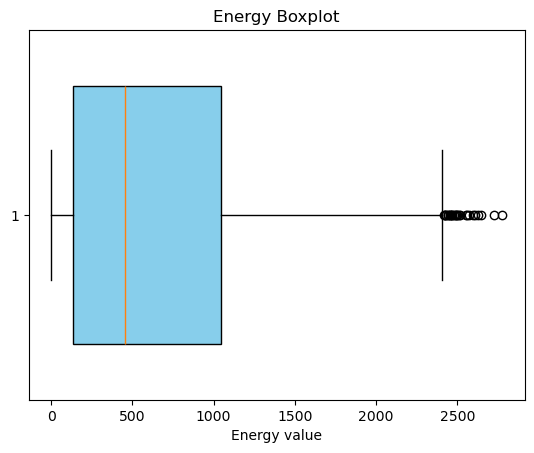

In [21]:
plt.boxplot(train_train_data['energy'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Energy Boxplot')
plt.xlabel('Energy value')
plt.show()

## 3. Preprocessing 

### 3.1. Feature selection

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

In [23]:
import numpy as np
import pandas as pd
from sklearn import __version__ as sklearn_version

print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn_version}")

NumPy version: 1.26.2
Pandas version: 2.1.4
Scikit-learn version: 1.3.2


In [24]:
# Load a sample dataset for demonstration
X = X_train
y = y_train

# Define the holdout split
indices= ([-1] * (len(X_train_train))) + ([0] * (len(X_train_validation)))
inner= PredefinedSplit(indices)

# Create a pipeline with a placeholder KNN model
pipeline = Pipeline([
    ('imputer', SimpleImputer()), 
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest()),  # Placeholder, will be replaced during grid search
    ('knn', KNeighborsRegressor())
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'feature_selection__score_func': [f_classif, mutual_info_classif],
    'feature_selection__k': [20, 30, 40]  # Adjust as needed
}


# Use GridSearchCV to find the best combination of parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=inner, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X, y)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Best Model MAE: {mae}")

C:\Users\victoria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victoria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victoria\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\victoria\anaconda3\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\victoria

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

In [ ]:
# Access the selected features
selected_features = best_model.named_steps['feature_selection'].get_support()

# Print the indices of selected features
selected_feature_indices = np.where(selected_features)[0]
print(f"Indices of selected features: {selected_feature_indices}")

In [ ]:
train_data


### 3.2. Imputation


### 3.3. Scaling